# Data Cleansing in Python

## Chapter 2 - Text and Categorical Data Problems

### Category and Membership Constraints

It is best practice to keep a log of all the possible values of categorical data being stored in a DataFrame, as it makes identifying inconsistencies easier by enabling an outer join using the .set() function to identify what categorical values are in the study_data DataFrame and change that with the .difference() method to compare the created set to the values in the categories DataFrame. 

In [3]:
import pandas as pd
import os
os.chdir('c:\\datacamp\\data')
study_data = pd.read_csv('study.csv')
categories = pd.read_csv('categories.csv')
print(study_data)
print(categories)

       name    birthday blood_type
0      Beth  2019-10-20         B-
1  Ignatius  2020-07-08         A-
2      Paul  2019-03-17         O+
3     Helen  2019-03-17         O-
4  Jennifer  2019-12-17         Z+
5   Kennedy  2020-04-27         A+
6     Keith  2019-04-19        AB+
  blood_type
0         O-
1         O+
2         A-
3         A+
4         B+
5         B-
6        AB+
7        AB-


In [2]:
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)

{'Z+'}


Using the output of the inconsistent_categories as the argument for the .isin() method, all of the rows in the study_data DataFrame with inconsistent category responses for the 'blood_type' column can be identified as a list of boolean values. Using this list of bools to subset the study_data DataFrame will indentify which row(s) have inconsistent categorical responses in the 'blood_type' column of the study_data DataFrame

In [13]:
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
print(inconsistent_rows)
study_data[inconsistent_rows]

0    False
1    False
2    False
3    False
4     True
5    False
6    False
Name: blood_type, dtype: bool


,name,birthday,blood_type
4,Jennifer,2019-12-17,Z+


To drop the inconsistent data quickly, use the ~ (tilde) symbol in front of the subset parameter.

In [14]:
study_data[~inconsistent_rows]

,name,birthday,blood_type
0,Beth,2019-10-20,B-
1,Ignatius,2020-07-08,A-
2,Paul,2019-03-17,O+
3,Helen,2019-03-17,O-
5,Kennedy,2020-04-27,A+
6,Keith,2019-04-19,AB+


### Exercise 1

#### Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

__Instructions:__
* Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
* Print the unique values of the survey columns in airlines using the .unique() method.
* Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
* Find rows of airlines with a cleanliness value not in categories and print the output.
* Print the rows with the consistent categories of cleanliness only.

In [23]:
airline_categories = pd.read_csv('c:\\datacamp\\data\\airlinecategories.csv')
airlines = pd.read_csv('c:\\datacamp\\data\\airlines.csv')

# Print categories DataFrame
print(airline_categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty' 'Somewhat Clean'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [22]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(airline_categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

     Unnamed: 0    id        day           airline      destination  \
4             4  2992  Wednesday          AMERICAN            MIAMI   
17           18  2913     Friday  TURKISH AIRLINES         ISTANBUL   
89          100  2321  Wednesday         SOUTHWEST      LOS ANGELES   
928        1055  2698  Wednesday    AIR FRANCE/KLM  PARIS-DE GAULLE   

     dest_region dest_size boarding_area   dept_time  wait_min  \
4        East US       Hub   Gates 50-59  12/31/2018       559   
17   Middle East       Hub  Gates 91-102  12/31/2018       225   
89       West US       Hub   Gates 20-39  12/31/2018       130   
928          eur       Hub    Gates 1-12  12/31/2018       285   

        cleanliness         safety        satisfaction  
4      Unacceptable      Very safe  Somewhat satsified  
17     Unacceptable      Very safe  Somewhat satsified  
89     Unacceptable  Somewhat safe  Somewhat satsified  
928  Somewhat Clean    Very unsafe      Very satisfied  


In [26]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(airline_categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

     Unnamed: 0    id        day           airline      destination  \
4             4  2992  Wednesday          AMERICAN            MIAMI   
17           18  2913     Friday  TURKISH AIRLINES         ISTANBUL   
89          100  2321  Wednesday         SOUTHWEST      LOS ANGELES   
928        1055  2698  Wednesday    AIR FRANCE/KLM  PARIS-DE GAULLE   

     dest_region dest_size boarding_area   dept_time  wait_min  \
4        East US       Hub   Gates 50-59  12/31/2018       559   
17   Middle East       Hub  Gates 91-102  12/31/2018       225   
89       West US       Hub   Gates 20-39  12/31/2018       130   
928          eur       Hub    Gates 1-12  12/31/2018       285   

        cleanliness         safety        satisfaction  
4      Unacceptable      Very safe  Somewhat satsified  
17     Unacceptable      Very safe  Somewhat satsified  
89     Unacceptable  Somewhat safe  Somewhat satsified  
928  Somewhat Clean    Very unsafe      Very satisfied  
      Unnamed: 0    id      

### Categorical Data

Categorical data can have value inconsistency errors, due to issues likes misspelling or inconsistent capitalization or trailing or leading white spaces or any combination of these. There also may be too many or not enough categories and then making sure that the data in the categorical field is the correct type. 

#### Value Consistency

To get a count of the different value responses in a categorical field, the column can be extracted from a DataFrame as a series and the .value_counts() method can be used. .value_counts() can only be used on a series.
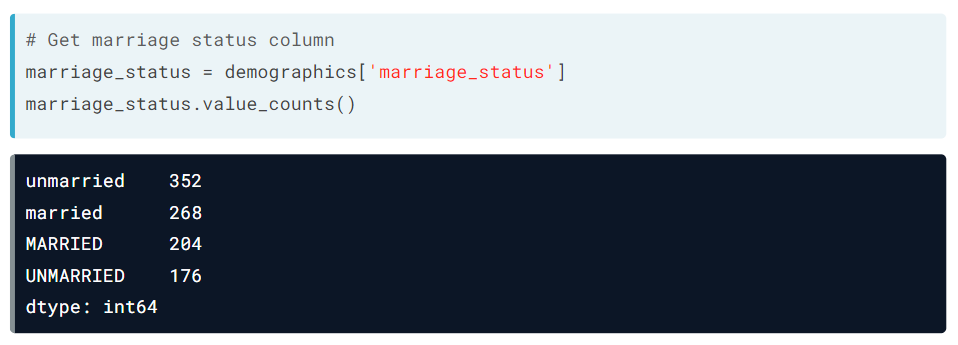

To get the value counts from the DataFrame directly, the .groupby() method is used on the column and chained with the .count() method.
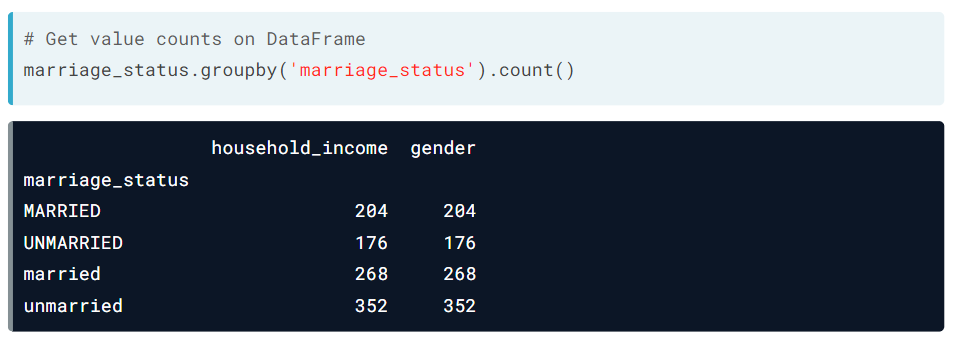

To address the capitalization issue, the column in the DataFrame can be reassigned itself with the .str.upper() method or the .str.lower() functions.
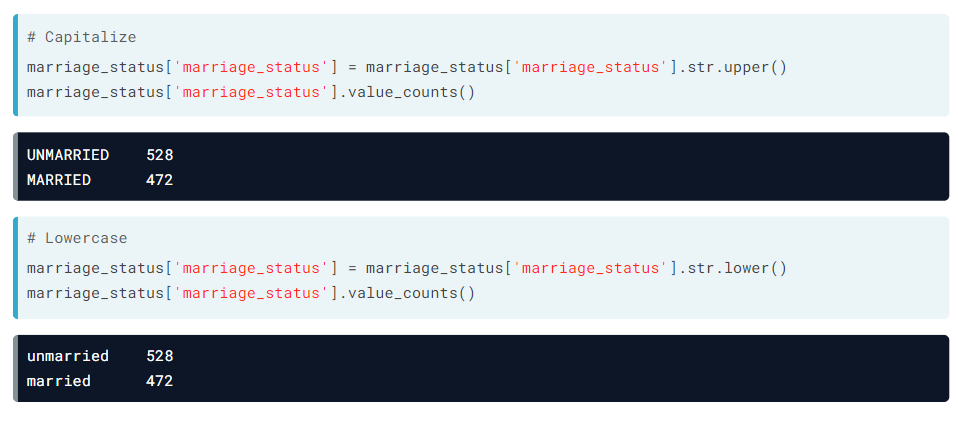

To remove leading or trailing spaces, rather than reassigning the column using the upper or lower functions, the .str.strip() method that will remove all leading and trailing white spaces. 

#### Collapsing Data into Categories

Sometime it may be necessary to create categories of data like income needs to be collapsed into income groups. The Pandas .qcut() function can be used to automatically divide the data based on the distribution into the number of categories set in the q = argument. The labels = argument accepts a list of names for each category.

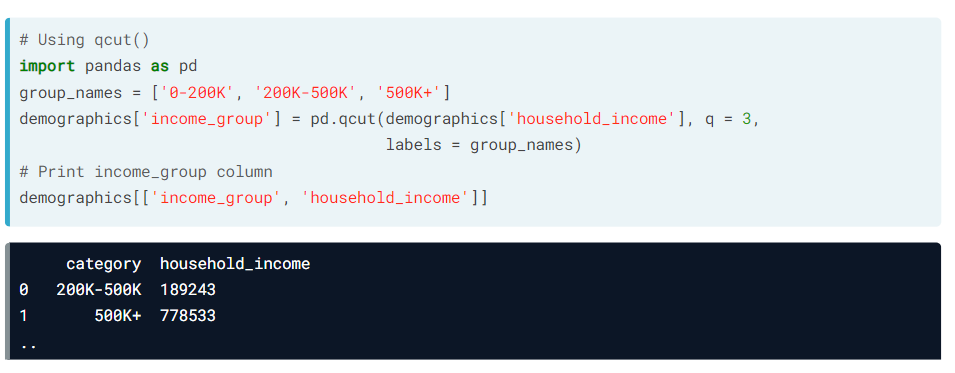

Another way to automate the creation of categories from data us to use the Pandas .cut() function. .cut() function has a bins = argument that accepts a list of cut off points for each category and a labels = argument that accepts a list of names for each category. Notice that the range list ends with the NumPy .inf entry to represent infinity.

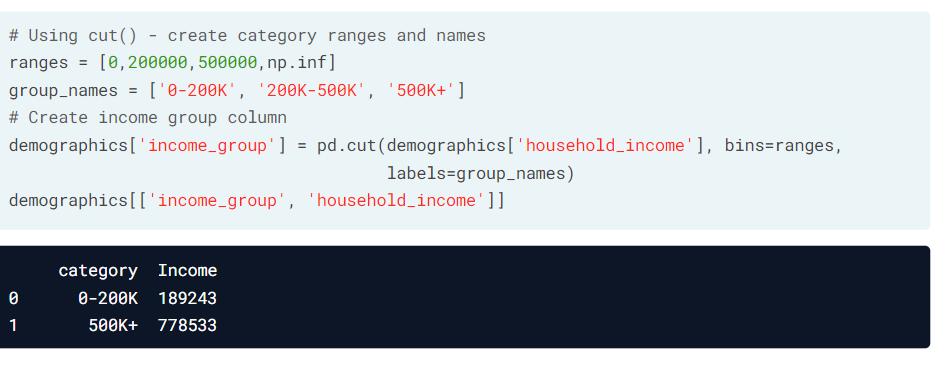

Other situations may require reducing the number of categories in a categorical column. Mapping categories to a fewer number of categories uses a Python dictionary to map the existing category to the corresponding new category and then providing the dictionary to the .replace() method to modify the existing column. 

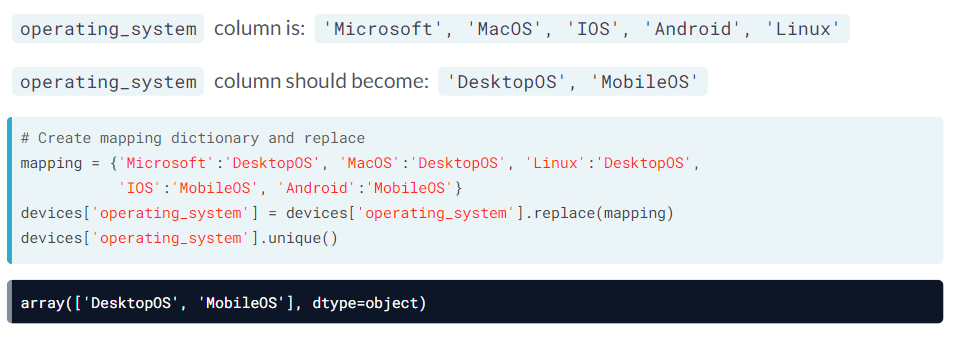

### Exercise 2

#### Inconsistent categories

In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

__Instructions:__
* Print the unique values in dest_region and dest_size respectively.
* Change the capitalization of all values of dest_region to lowercase.
* Replace the 'eur' with 'europe' in dest_region using the .replace() method.
* Strip white spaces from the dest_size column using the .strip() method.
* Verify that the changes have been into effect by printing the unique values of the columns using .unique() .

In [30]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


#### Remapping categories

To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

__Instructions:__
* Create the ranges and labels for the wait_type column mentioned in the description above.
* Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
* Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
* Create the day_week column by using .replace().

In [32]:
import numpy as np
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

### Cleaning Text Data

Common text data data problems include inconsistent ways of entering data, like phone numbers or making sure text data is of a certain length, the password must be at least 8 characters, or that the data entered is just wrong. When text data clean is relatively simple, tools like .str.replace() can be used to remove unneeded characters like dashes or plus signs in phone numbersand comparison operators can be used to confirm columns meet a minimum or maximum length.

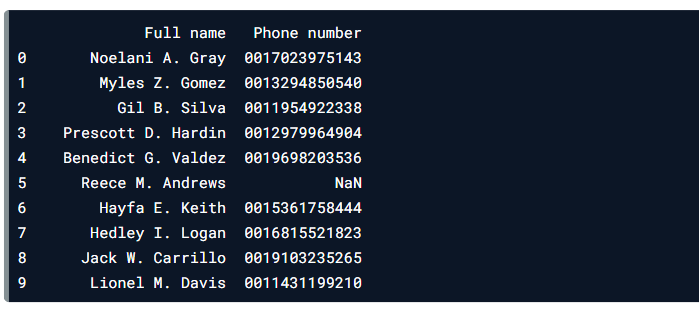

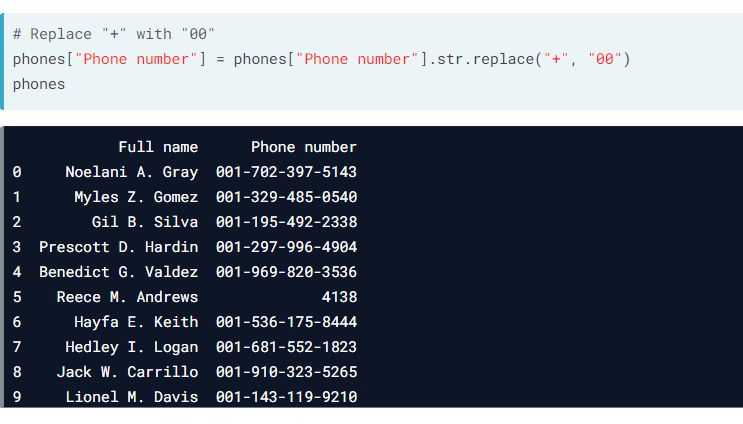

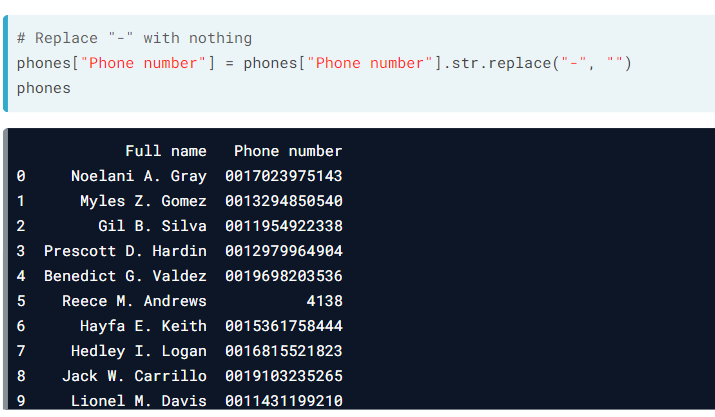

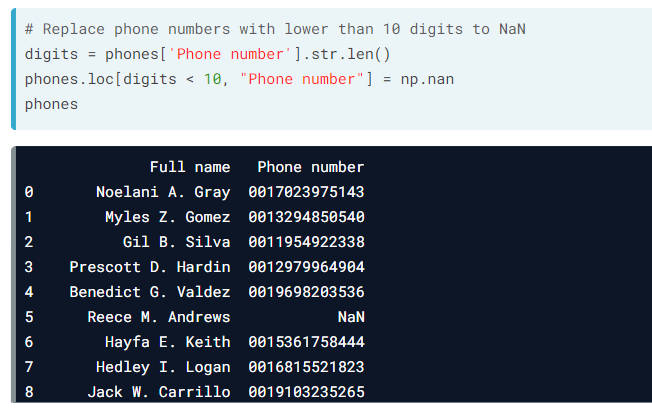

More complicated text data cleansing will require using Python's Regular Express (regex).

### Exercise 3

#### Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

__Instructions:__
* Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
* Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

In [37]:
airlines2 = pd.read_csv('c:\\datacamp\\data\\airlines2.csv')

# Replace "Dr." with empty string ""
airlines2['full_name'] = airlines2['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines2['full_name'] = airlines2['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines2['full_name'] = airlines2['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines2['full_name'] = airlines2['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines2['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

#### Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

__Instructions:__
* Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
* Isolate the rows of airlines with resp_length higher than 40.
* Assert that the smallest survey response length in airlines_survey is now bigger than 40.

In [38]:
# Store length of each row in survey_response column
resp_length = airlines2['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines2[resp_length>40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

17     The airport personnell forgot to alert us of d...
18     The food in the airport was really really expe...
19     One of the other travelers was really loud and...
37     The airport personnell forgot to alert us of d...
38     The food in the airport was really really expe...
39     One of the other travelers was really loud and...
57     The airport personnell forgot to alert us of d...
58     The food in the airport was really really expe...
59     One of the other travelers was really loud and...
77     The airport personnell forgot to alert us of d...
78     The food in the airport was really really expe...
79     One of the other travelers was really loud and...
97     The airport personnell forgot to alert us of d...
98     The food in the airport was really really expe...
99     One of the other travelers was really loud and...
117    The airport personnell forgot to alert us of d...
118    The food in the airport was really really expe...
119    One of the other travele